## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/GLAIML/Dog_Breed/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

[link text](https://)Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels_df = pd.read_csv('labels.csv')

In [10]:
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
labels_df.shape

(10222, 2)

### Print the count of each category of Dogs given in the dataset



In [0]:
breed_count = labels_df['breed'].value_counts()

In [13]:
breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [14]:
breed_count.shape

(120,)

### Get one-hot encodings of labels

In [0]:
targets = pd.Series(labels_df['breed'])

In [0]:
one_hot = pd.get_dummies(targets, sparse = True)
one_hot_labels = np.asarray(one_hot)

In [17]:
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128
num_channel = 1

In [19]:
from tqdm import tqdm
import cv2
x_train = []
y_train = []
y_label = []

i=0
for f, img in tqdm(labels_df.values):
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  one_hot_lab = one_hot_labels[i]
  train_img_resize = cv2.resize(train_img, (img_rows, img_cols))
  x_train.append(train_img_resize)
  y_train.append(one_hot_lab)
  y_label.append(img)
  i=i+1

100%|██████████| 10222/10222 [00:24<00:00, 410.52it/s]


In [20]:
x_train[10].shape

(128, 128, 3)

In [21]:
y_label[0]

'boston_bull'

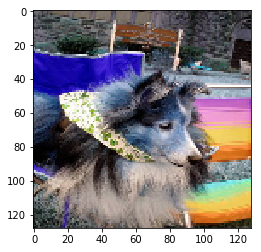

In [22]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10])

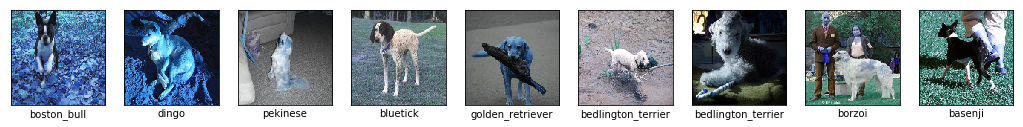

In [23]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_label[i])
plt.show()

In [24]:
x_train[0].shape

(128, 128, 3)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [25]:
x_train_data = np.array(x_train,np.float32)/255
x_train_data.shape

(10222, 128, 128, 3)

In [27]:
y_train_data = np.array(one_hot_labels)
y_train_data.shape

(10222, 120)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [28]:
X_train, X_val, y_train, y_val = train_test_split(x_train_data, y_train_data, test_size=0.20 , random_state=1)

X_val.shape

(2045, 128, 128, 3)

In [29]:
X_train.shape

(8177, 128, 128, 3)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [30]:
samples = pd.read_csv('sample_submission.csv')
samples.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [31]:
samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Columns: 121 entries, id to yorkshire_terrier
dtypes: float64(120), object(1)
memory usage: 9.6+ MB


In [32]:
test_img = samples['id']
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [33]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:13<00:00, 794.53it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_data = np.array(x_test_feature,np.float32)/255

In [35]:
x_test_data.shape

(10357, 128, 128)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [36]:
from keras.models import Sequential  # initial NN
from keras.layers import Dense, Dropout, InputLayer # construct each layer
from keras.layers import Convolution2D # swipe across the image by 1
from keras.layers import MaxPooling2D # swipe across by pool size
from keras.layers import Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
import keras
from keras.models import Model

Using TensorFlow backend.


In [38]:
model = Sequential()

#Add a Convolutional Layer with 32 filters of kernel size 5X5 and activation function as 'ReLU' 
model.add(Convolution2D(32, kernel_size=(5, 5), padding='same', input_shape = (img_rows, img_cols, num_channel),activation = 'relu')) 
# Add Max Pooling layer of 3,3
model.add(MaxPooling2D(pool_size=(3,3)))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same', activation = 'relu'))
# Add Max Pooling layer of 3,3
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.8))

#Flatten the layer
model.add(Flatten()) 

#Add Fully Connected Layer with 256 neurons and activation function as 'ReLU'
model.add(Dense(units = 256, activation = 'relu')) 
model.add(Dropout(0.8))

# output layer with 120 neurons and activation function as 'softmax'
model.add(Dense(units = 120, activation = 'softmax')) 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Use batch_size = 128 and epochs = 10 and execute the model

In [39]:
optimizer = Adam(lr=0.1)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"]) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3211520   
__________

In [0]:
batch_size = 128
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, 
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 5s 571us/step - loss: 15.9742 - acc: 0.0089 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 2/10
8177/8177 [==============================] - 4s 507us/step - loss: 16.0018 - acc: 0.0072 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 3/10
8177/8177 [==============================] - 4s 506us/step - loss: 15.9841 - acc: 0.0083 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 4/10
8177/8177 [==============================] - 4s 505us/step - loss: 15.9919 - acc: 0.0078 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 5/10
8177/8177 [==============================] - 4s 506us/step - loss: 15.9860 - acc: 0.0082 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 6/10
8177/8177 [==============================] - 4s 505us/step - loss: 15.9565 - acc: 0.0100 - val_loss: 15.9920 - val_acc: 0.0078
Epoch 7/10
8177/8177 [==============================] - 4s 509us/step - loss: 16.0038 - acc: 0.0071 - val_loss: 15.9920 - va

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from keras.layers import ZeroPadding2D

# This will do preprocessing and realtime data augmentation:
train_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    #rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,  # randomly flip images     
    vertical_flip=False)  # randomly flip images


In [0]:
val_datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    #rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,  # randomly flip images     
    vertical_flip=False)  # randomly flip images

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
# Prepare the generator
train_generator = train_datagen.flow(x_train,y=y_train,batch_size=128)
val_generator = val_datagen.flow(x_val,y=y_val,batch_size=128)

Labels: ['irish_setter', 'irish_setter', 'irish_setter', 'irish_setter', 'irish_setter', 'irish_setter', 'irish_setter', 'irish_setter', 'irish_setter', 'irish_setter']


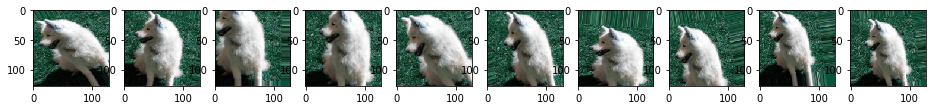

In [0]:
# Plotting one image generated from the above
img_id = 1000
train_generator1 = train_datagen.flow(x_train[img_id:img_id+1],y=y_label[img_id:img_id+1],batch_size=1)
gen = [next(train_generator1) for i in range(0,10)]
fig, ax = plt.subplots(1,10,figsize=(16,6))
print('Labels:', [item[1][0] for item in gen])
l = [ax[i].imshow(gen[i][0][0]) for i in range(0,10)]

Labels: ['otterhound', 'otterhound', 'otterhound', 'otterhound', 'otterhound', 'otterhound', 'otterhound', 'otterhound', 'otterhound', 'otterhound']


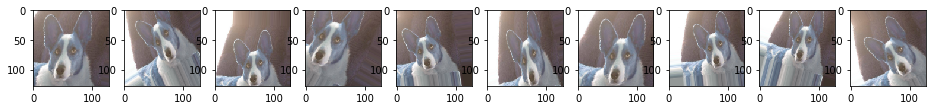

In [0]:
# Plotting one more image generated from the above
img_id = 2500
train_generator1 = train_datagen.flow(x_train[img_id:img_id+1],y=y_label[img_id:img_id+1],batch_size=1)
gen = [next(train_generator1) for i in range(0,10)]
fig, ax = plt.subplots(1,10,figsize=(16,6))
print('Labels:', [item[1][0] for item in gen])
l = [ax[i].imshow(gen[i][0][0]) for i in range(0,10)]

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model = Sequential()

#Add a Convolutional Layer with 32 filters of kernel size 5X5 and activation function as 'ReLU' 
model.add(Convolution2D(32, kernel_size=(5, 5), padding='same', input_shape = (img_rows, img_cols, num_channel),activation = 'relu')) 
# Add Max Pooling layer of 3,3
model.add(MaxPooling2D(pool_size=(3,3)))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same', activation = 'relu'))
# Add Max Pooling layer of 3,3
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.8))

#Flatten the layer
model.add(Flatten()) 

#Add Fully Connected Layer with 256 neurons and activation function as 'ReLU'
model.add(Dense(units = 256, activation = 'relu')) 
model.add(Dropout(0.8))

# output layer with 120 neurons and activation function as 'softmax'
model.add(Dense(units = 120, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"]) 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3211520   
__________

In [0]:
#batch_size = 128
epochs = 10
history = model.fit_generator(train_generator,
                    steps_per_epoch = 200,
                    epochs=epochs,
                    validation_steps = 5,
                    verbose=1,
                    validation_data=val_generator)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
200/200 [==============================] - 88s 440ms/step - loss: 4.7875 - acc: 0.0096 - val_loss: 4.7837 - val_acc: 0.0125
Epoch 2/10
200/200 [==============================] - 83s 414ms/step - loss: 4.7662 - acc: 0.0157 - val_loss: 4.7496 - val_acc: 0.0219
Epoch 3/10
200/200 [==============================] - 82s 412ms/step - loss: 4.7043 - acc: 0.0197 - val_loss: 4.6380 - val_acc: 0.0203
Epoch 4/10
200/200 [==============================] - 83s 414ms/step - loss: 4.6261 - acc: 0.0244 - val_loss: 4.5615 - val_acc: 0.0283
Epoch 5/10
200/200 [==============================] - 83s 415ms/step - loss: 4.5675 - acc: 0.0282 - val_loss: 4.5355 - val_acc: 0.0312
Epoch 6/10
200/200 [==============================] - 83s 413ms/step - loss: 4.5353 - acc: 0.0301 - val_loss: 4.5012 - val_acc: 0.0500
Epoch 7/10
200/200 [==============================] - 82s 410ms/step - loss: 4.4969 - acc: 0.0326 - val_loss: 4.4446 - val_acc: 0.0330
Epoch 8

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.layers import Input
input_tensor = Input(shape=(128,128,3))

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [32]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [25]:
base_model.output_shape[1:]

(4, 4, 512)

In [0]:
x = base_model.output
x = Flatten(input_shape=base_model.output_shape[1:])(x)
x = Dense(1024, activation='relu')(x)
x = Dense(256, activation='relu')(x)
pred = Dense(120, activation='softmax')(x)
model1 = Model(base_model.input, pred)

In [37]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

### Make all the layers in the base_model (VGG16) to be non-trainable

In [27]:
for layer in base_model.layers:
    layer.trainable = False
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f1e34967f28>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f1e4f9eff98>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f1e24459c88>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f1e24478be0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f1e24418278>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f1e243c61d0>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f1e243d7898>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f1e243d7400>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f1e24386550>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f1e243a0b70>,block3_conv3,False


In [39]:
layers = [(layer, layer.name, layer.trainable) for layer in model1.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f041d3aeef0>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f041ce62e80>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f040c83f160>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f040c8628d0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f040c862240>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f040c816240>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f040c82dd30>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f040c82d9e8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f040c7d8860>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f040c7f5c50>,block3_conv3,False


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [45]:
# creating the final model 
model1.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])
batch_size = 128
epochs = 10

history = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, 
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 28s 3ms/step - loss: 4.7376 - acc: 0.0280 - val_loss: 4.5341 - val_acc: 0.0421
Epoch 2/10
8177/8177 [==============================] - 17s 2ms/step - loss: 4.0721 - acc: 0.0988 - val_loss: 3.9109 - val_acc: 0.1086
Epoch 3/10
8177/8177 [==============================] - 17s 2ms/step - loss: 3.2598 - acc: 0.2166 - val_loss: 3.6006 - val_acc: 0.1594
Epoch 4/10
8177/8177 [==============================] - 17s 2ms/step - loss: 2.6942 - acc: 0.3262 - val_loss: 3.5001 - val_acc: 0.1780
Epoch 5/10
8177/8177 [==============================] - 16s 2ms/step - loss: 2.2186 - acc: 0.4406 - val_loss: 3.4566 - val_acc: 0.1829
Epoch 6/10
8177/8177 [==============================] - 17s 2ms/step - loss: 1.8298 - acc: 0.5334 - val_loss: 3.5137 - val_acc: 0.1966
Epoch 7/10
8177/8177 [==============================] - 17s 2ms/step - loss: 1.4945 - acc: 0.6260 - val_loss: 3.6159 - val_acc: 0.1936
Epoch 8

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

In [47]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [48]:
#preparing the train image to pass it on the convolution network
from keras.preprocessing import image

X_arr = []

for id, label in tqdm(labels.values):
    X_arr.append(base_model.predict(preprocess_input(np.expand_dims(img_to_array(image.load_img('./train/'+id+'.jpg', target_size=[128,128])), axis=0)))[0])
X = pd.DataFrame(X_arr)

100%|██████████| 10222/10222 [01:22<00:00, 124.50it/s]


In [0]:
from keras.layers import Activation
model = Sequential([
    Dense(1024, input_shape=(512,)),
    Activation('relu'),
    Dense(256, input_shape=(512,)),
    Activation('relu'),
    Dense(120),
    Activation('softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
X_train = X
y_train = y_feature

In [52]:
for layer in base_model.layers:
    layer.trainable = False
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f89bf85fa58>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x7f89b1517f98>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f89b12f06a0>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f89b111e6a0>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f89b111ec50>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f89b10df470>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f89b1078908>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f89b1078eb8>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f89b10a5a58>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f89b103a518>,block3_conv3,False


In [53]:
model.fit(X_train, np.asarray(y_train), epochs=10, batch_size=128, verbose=True)

Epoch 1/10
10222/10222 [==============================] - 1s 73us/step - loss: 4.7662 - acc: 0.1319
Epoch 2/10
10222/10222 [==============================] - 0s 43us/step - loss: 2.3576 - acc: 0.4023
Epoch 3/10
10222/10222 [==============================] - 0s 41us/step - loss: 1.6190 - acc: 0.5513
Epoch 4/10
10222/10222 [==============================] - 0s 42us/step - loss: 1.1873 - acc: 0.6568
Epoch 5/10
10222/10222 [==============================] - 0s 41us/step - loss: 0.8331 - acc: 0.7632
Epoch 6/10
10222/10222 [==============================] - 0s 42us/step - loss: 0.5442 - acc: 0.8495
Epoch 7/10
10222/10222 [==============================] - 0s 41us/step - loss: 0.3345 - acc: 0.9121
Epoch 8/10
10222/10222 [==============================] - 0s 41us/step - loss: 0.1902 - acc: 0.9564
Epoch 9/10
10222/10222 [==============================] - 0s 43us/step - loss: 0.1033 - acc: 0.9829
Epoch 10/10
10222/10222 [==============================] - 0s 41us/step - loss: 0.0528 - acc: 0.9951